In [1]:
import pandas as pd
df = pd.read_csv('data/IL.csv')
df.head()

,Normalized_SMILES,Melting_point(K),Melting_point(K)_STD,Glass_transition_temperature(K),Glass_transition_temperature(K)_STD,Thermal_decomposition_temperature(K),Thermal_decomposition_temperature(K)_STD,logEC50,logEC50_STD,T/K,...,ln_Viscosity(mPas)_STD,Surface tension(mN/m),Surface tension(mN/m)_STD,Refractive index_STD,ln(xCO2)_298K_1bar,ln(xCO2)_298K_1bar_STD,Heat capacity(J/mol/K),Heat capacity(J/mol/K)_STD,ln(xCO2)_328K_1bar,ln(xCO2)_328K_1bar_STD
0,CC(=O)[O-].C[N+]1(C)CCCCCC1,366.5,9.990,192.9,3.475,470.5,11.020,4.445,0.08435,298,...,0.2950,38.00,1.1950,0.003220,-3.758,0.2477,6.010,0.04916,-4.100,0.2268
1,CCC(=O)[O-].C[N+]1(C)CCCCCC1,355.2,9.000,197.8,4.660,461.0,12.375,4.270,0.06555,298,...,0.2966,36.30,0.8550,0.002674,-3.768,0.2842,6.062,0.04224,-4.105,0.2654
2,CCCC(=O)[O-].C[N+]1(C)CCCCCC1,341.8,9.340,207.9,4.770,473.0,14.710,3.920,0.08520,298,...,0.2942,34.80,0.7495,0.002466,-3.744,0.2952,6.125,0.03310,-4.080,0.2740
3,CCCCC(=O)[O-].C[N+]1(C)CCCCCC1,351.8,10.810,207.8,4.453,477.5,12.490,4.040,0.05942,298,...,0.2073,33.56,0.7150,0.002815,-3.703,0.3080,6.195,0.03232,-4.035,0.2834
4,CCCCCC(=O)[O-].C[N+]1(C)CCCCCC1,347.2,7.656,216.4,4.492,482.0,10.780,3.760,0.06555,298,...,0.3318,32.38,0.8496,0.002708,-3.630,0.3180,6.297,0.03098,-3.959,0.2950


In [2]:
filtered_df = df[(df['Melting_point(K)'] < 298) & (df['Thermal_decomposition_temperature(K)'] > 473) & (df['logEC50'] > 3) & (df['ln_Viscosity(mPas)'] < 4.6)&(df['ln_Electrical_conductivity(S/m)'] > 0.182)]
len(filtered_df)

50

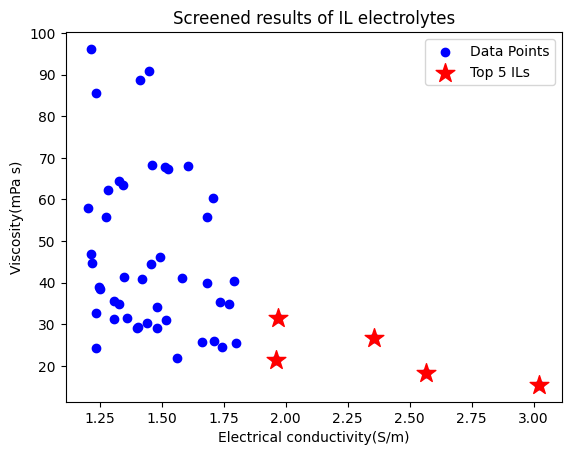

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

A = filtered_df['ln_Electrical_conductivity(S/m)']
B = filtered_df['ln_Viscosity(mPas)']

x = np.exp(A)
y = np.exp(B)

top_5_indices = np.argsort(x)[-5:]
plt.scatter(x, y, label="Data Points", color='blue')
plt.scatter(x.iloc[top_5_indices], y.iloc[top_5_indices], color='red', marker='*', s=200, label="Top 5 ILs")

plt.title('Screened results of IL electrolytes')
plt.xlabel('Electrical conductivity(S/m)')
plt.ylabel('Viscosity(mPa s)')

plt.grid(False)  
plt.legend()  
plt.show()


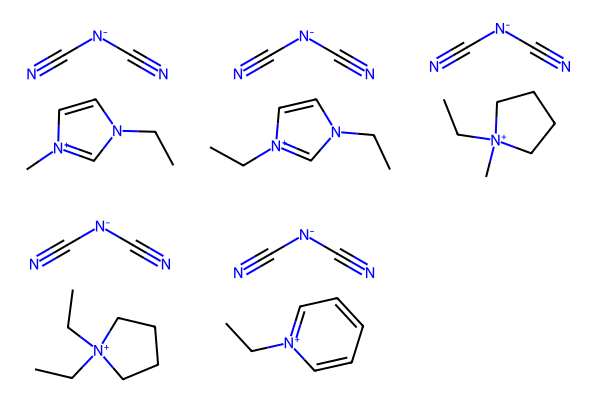

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

top_5_df = filtered_df.nlargest(5, 'ln_Electrical_conductivity(S/m)')
smiles_list = top_5_df['Normalized_SMILES'].drop_duplicates()
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200, 200))
img
